## Time Series

Time-  Date/ Time
Series- Changes in the varaiations 

- It help to understand dthe change in the data over the period of the time 
- Y is numeric in nature ( Continous in nature), and data and time is alway associated
- It is Supervised ML algorithm
- Data is labelled( have X and Y both)
- It uses in
     - Stock Price predictions
     - Gold Price predictions 
     - Product Sales 
     - Weather forecaste

Regression
- Y should have a linear realtion with X which is called as Corrlation

Time sreies
- Y predicted on the previous value of Y
    - Auto correlation
    

Time series model Includes
- Time Series Analysis- descriptive analysis
- Time Series Forecasting- Predictive analysis


Characteristc of the Time Series
- Single Dimension Data- Only Y and data and time component
- Sort the data into the cronological order
- Groupin the data based on the date and time with aggregated measures
- Setting the dat and time as a Index
- Equally spaced samples

Training
- No random sampling will happedn when the data is splitted into training and testing. splittimg with manual appraoch would be considered

Validation
- Comapre Y actual and Y Prediction

Evaluation Metrics

- RMSE
- AIC 



Tunning

- Hyperparameter
- Addiding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("Sample - Superstore.xls", header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

<Axes: >

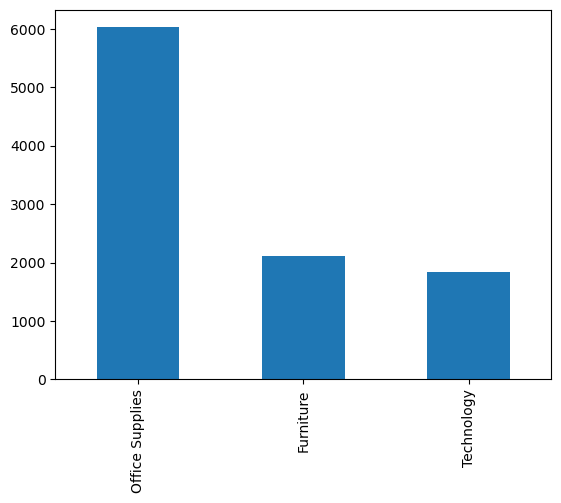

In [3]:
df.Category.value_counts().plot(kind="bar")

## Filitering the Data based on the Furntiure category

In [4]:
furniture=df[df["Category"]=="Furniture"]
furniture.shape

(2121, 21)

In [5]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
#furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [7]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

The data is available from jan 2014 to 2017 for the analysis

### 1. Single Dimensional Data

In [8]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [9]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


### 2. Arrange or sort the date and time in Cronological ( Ascending )Order

In [10]:
furniture=furniture.sort_values('Order Date', ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


### 3. Grouping the data on basis on date and time

In [12]:
furniture= furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [13]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


### 4. Set date/ Time as index of the data

In [14]:
furniture=furniture.set_index('Order Date')

In [15]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [16]:
furniture.shape

(889, 1)

### 5. Equally spaced data and time

In [17]:
y=furniture["Sales"].resample('MS').mean()    # if type 'MS' it will give month start date

In [18]:
y.shape

(48,)

In [19]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

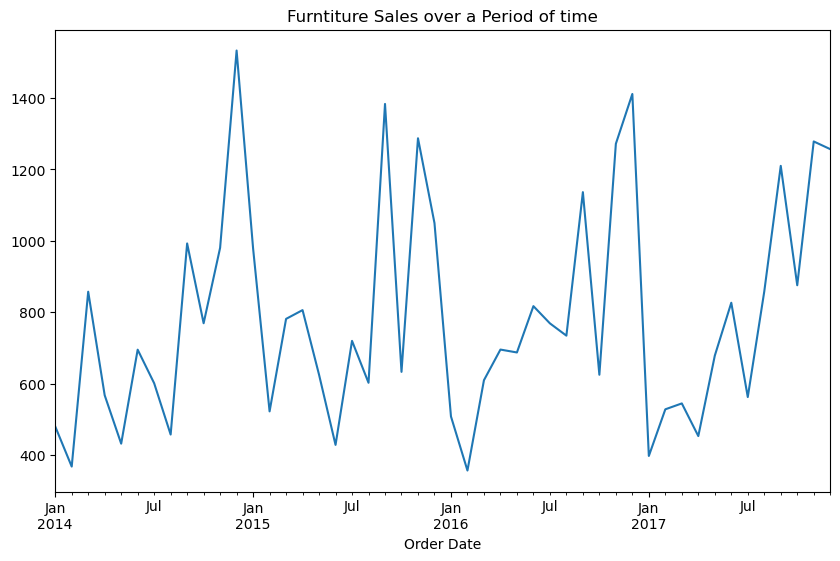

In [20]:
y.plot(figsize=(10,6))
plt.title('Furntiture Sales over a Period of time')
plt.show()

## Families of the Time series 

- Exponential Smoothing
- ARIMA - Auto Regressive Integrated Moving Average 

Exponential Smoothing

1- Simple Average 

2- Rolling Average 

3- Exponential Smoothing:

Less Important to the past data and more important to the recent data for predictions

Have Three Types:
- Simple Exponential Smoothing ( Alpha )
     
     - It will assign weight to each value where the past data is given less importance 
     - Alpha is a smoothing level ( value 0 to 1)
     - value near to 0 indicate the older data have less importance
     - value near to 1 indicate the older data is important is simliar to recent data
     
- Double Expomemtial Smoothing- 2nd Order

     - Halt Linear Trend Model
     - It focus on the trend, no seasonaity factor added, only on the basis of trends
     - Two Parametere, alphha and Beta
     - Beta - smoothing slope.
     - Beta value should be (0 to 1)
   
- Holt-Winter smoothing Model- 3rd Order 

     - Three Parametere, alphha,  Beta and Gamma
     - Gamma- Seasonal Period


### Train and Split - Manually

In [21]:
train=y.loc[:"2016-12-01"]
train.shape


(36,)

In [22]:
test=y.loc["2017-01-01":]
test.shape

(12,)

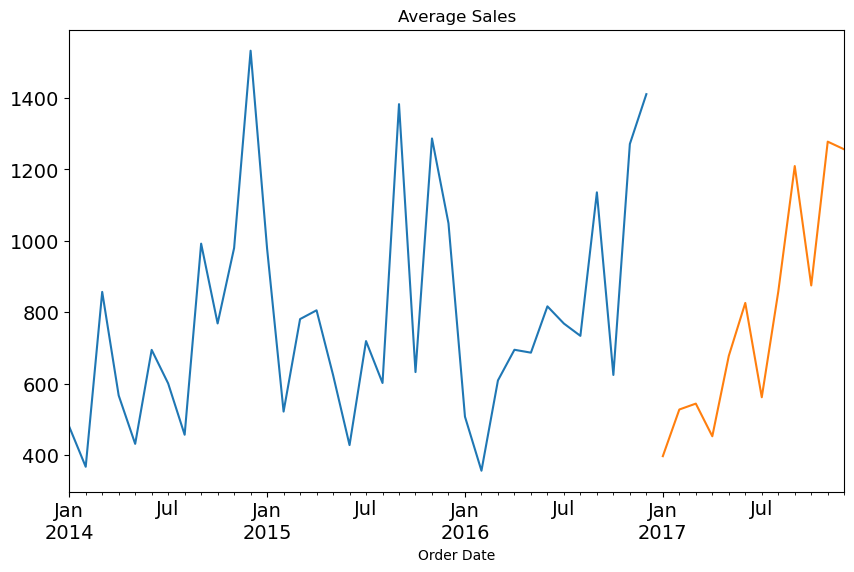

In [23]:
train.plot(figsize=(10,6), title='Average Sales', fontsize=14)
test.plot(figsize=(10,6), title='Average Sales', fontsize=14)
plt.show()

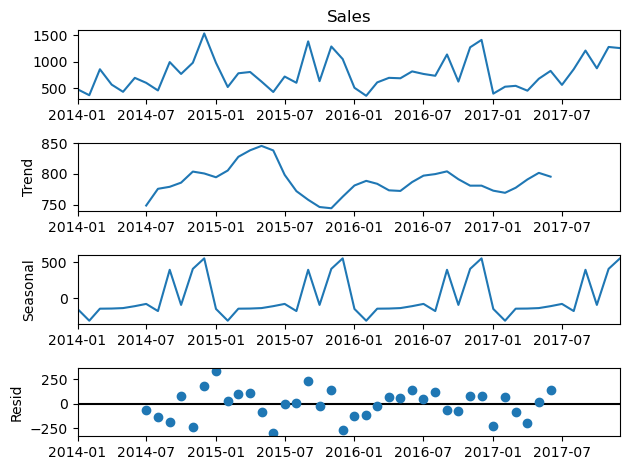

In [24]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(y)   # tsa= time series analysis
decomposition.plot()
plt.show()

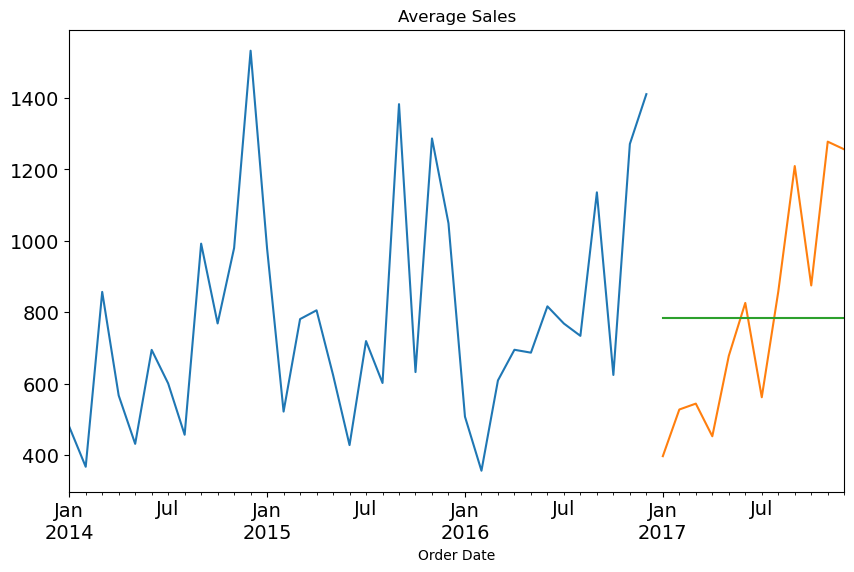

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth=test.copy()

fit1=SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES']=fit1.forecast(steps=len(test))  #steps= for how many period you want to forecast(like 6 for 6 months)

train.plot(figsize=(10,6), title='Average Sales', fontsize=14)
test.plot(figsize=(10,6), title='Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title='Average Sales', fontsize=14)
plt.show()

In [26]:
Exp_Smooth.SES


2017-01-01    784.196954
2017-02-01    784.196954
2017-03-01    784.196954
2017-04-01    784.196954
2017-05-01    784.196954
2017-06-01    784.196954
2017-07-01    784.196954
2017-08-01    784.196954
2017-09-01    784.196954
2017-10-01    784.196954
2017-11-01    784.196954
2017-12-01    784.196954
Freq: MS, dtype: float64

In [27]:
# AIC is use to compare different model with same algo but different data / parameters
# AIC value should be less better the model performance, choose the model with less AIC value
# It depend on the alpha value
fit1.aic

415.87664216026513

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

303.4766834364632


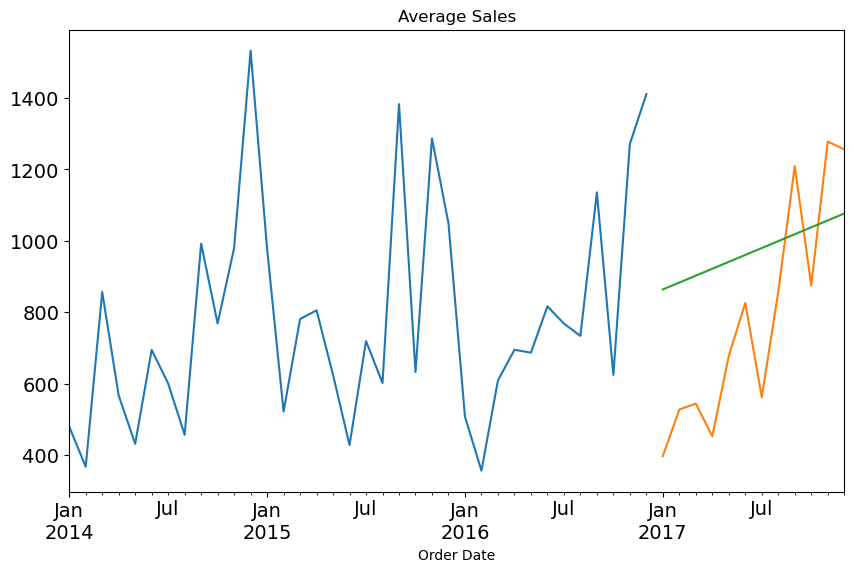

In [29]:
from statsmodels.tsa.api import Holt    # Holt Linear Trend Model
Holt_df=test.copy()
fit1=Holt(train).fit(smoothing_level=0.1, smoothing_trend=0.24)  # near to 0 to will give linear 
Holt_df['Holt_linear']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title='Average Sales', fontsize=14)
test.plot(figsize=(10,6), title='Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title='Average Sales', fontsize=14)
plt.show()

In [30]:
fit1.aic

423.8953686603716

In [31]:
Holt_df['Holt_linear']

2017-01-01     864.167696
2017-02-01     883.485837
2017-03-01     902.803977
2017-04-01     922.122117
2017-05-01     941.440258
2017-06-01     960.758398
2017-07-01     980.076538
2017-08-01     999.394679
2017-09-01    1018.712819
2017-10-01    1038.030959
2017-11-01    1057.349100
2017-12-01    1076.667240
Freq: MS, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Holt_df.Holt_linear))
print(rmse)

305.1462726770838


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import numpy as np
my_dict={}
for i in np.arange (0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        Holt_df=test.copy()
        
        fit1=Holt(train).fit(smoothing_level=i, smoothing_trend=j)
        my_dict[i,j]=fit1.aic




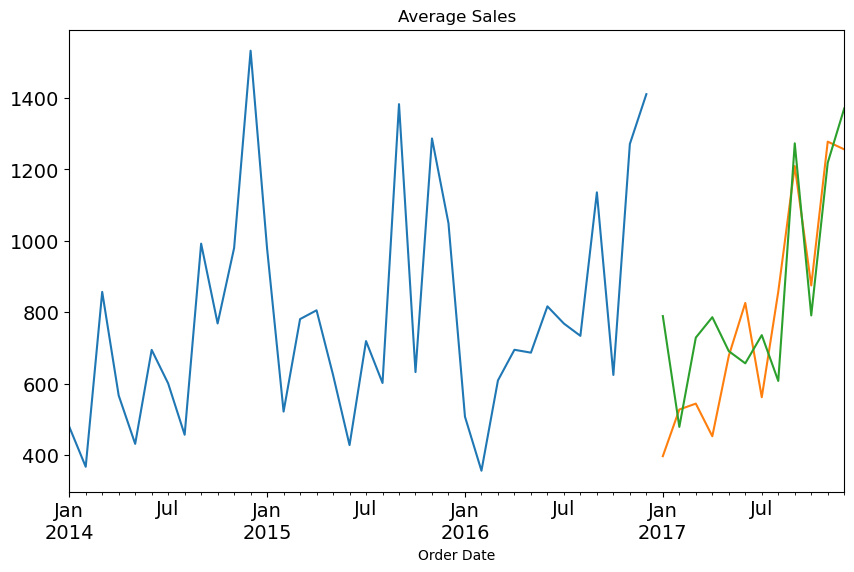

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df=test.copy()

fit1=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
Holt_Winter_df["Holt_Winter"]=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title='Average Sales', fontsize=14)
test.plot(figsize=(10,6), title='Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title='Average Sales', fontsize=14)
plt.show()

In [36]:
fit1.aic

392.39062473148135

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(test, Holt_Winter_df.Holt_Winter))
print(rmse)

193.7115308386924


### Forecasting 

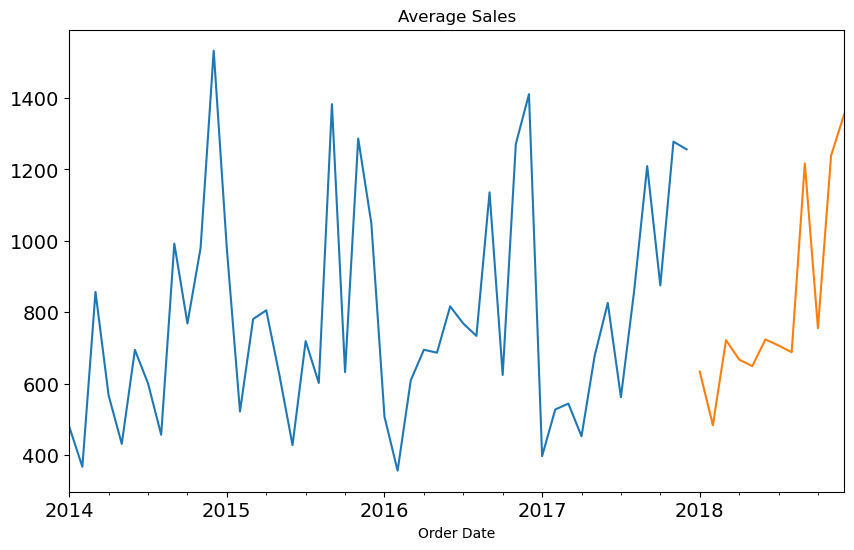

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing

fit1=ExponentialSmoothing(y, seasonal_periods=12, trend='add', seasonal='add').fit()
y_pred=fit1.forecast(steps=len(test))

y.plot(figsize=(10,6), title='Average Sales', fontsize=14)
y_pred.plot(figsize=(10,6), title='Average Sales', fontsize=14)

plt.show()

In [39]:
y_pred

2018-01-01     634.610051
2018-02-01     484.385986
2018-03-01     722.211499
2018-04-01     668.084427
2018-05-01     649.422006
2018-06-01     724.302087
2018-07-01     707.463743
2018-08-01     688.555938
2018-09-01    1216.975767
2018-10-01     755.936340
2018-11-01    1239.032471
2018-12-01    1354.748692
Freq: MS, dtype: float64

In [40]:
y_pred.to_excel("TimeSeriesOutput.xlsx", header=['Sales'], index=True)

# ARIMA- Auto Regressive Integrated Moving Average 
- AR- Auto regressive It is termed as P
- MA- Moving Averages is termed as q
- I- It is stand as d

ARIMA-  ( p, d, q )

### SARIMA- Seasonal ARIMA 

( p, d, q ) ( P, D, Q ) * m

- Include - ( p, d, q )- Trend components
- Include - ( P, D, Q )- Seasonal components 
- Include - m- Seasonal Period
### SARIMAX Function

##### 1- Auto regressive(AR)- p

- p is called as lag period that is how many numbers of periods are using for the predicitng the value
- if p=2 than it will take past 2 values for the future predictions.
- Equation formed as y= Bo + B1 y(t-1) + B2 y(t-2)

##### 2- Moving Averages (MA)- q

- Error termed is here
- Yt= Bo+ error y(t-1) + error y(t-2)

##### 3-Auto Regressive Moving Average (ARMA)- (p, q)
- p=3, q=2
- yt= Bo + B1 y(t-1) + B2 y(t-2) + B3 y(t-3)+ error y(t-1) + error y(t-2)
- Data must be stationary, data should follow the constant mean and variance
- ADF- Augmented Dicky Fuler is a test use to check wheather the data is stationary or not
- p value is there- if p is high data is not stationary

Ho- Data is Non-stationary

H1- Data is Stationary

- If ADF confirm the data is non stationary than we need tp convert it into the stationary format with the help of differncing Algo so we can perfrom the ARMA model

#### 4- Integration- d

if d is 0 then data is stationary in nature
if d is 1 then it will tell us its a first order differentiation
if d is 2 then it will tell us its a second order differentiation


- We use pmdarima to find the better or best parameters or optimum parameters for predictions or model buildling 


#### Box-Jenkins Menthod

1: Identification- Finding the optimum valus of pdq

2: Estimation - Buidling the model using the optimum values

3: Validation - Interpret the model how good it is

4: Forcasting - Forecast the future 

In [41]:
# p+q+P+Q <= 10, should be less than 10 so it will not go for more past values
# p+q <=3, it is a optimum values, we need to keep the as low as possible 

In [43]:
!pip install pmdarima

     -------------------------------------- 613.3/613.3 kB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 9.3 MB/s eta 0:00:00


In [44]:
import pmdarima as pm

In [45]:
model= pm.auto_arima( y, start_p=0, max_p=3, d=None, max_d=2, start_q=0, max_q=3,
                    start_P=0, max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                    max_order=10, m=12, seasonal=True, information_criterion='aic',
                    test='adf', trace=True, random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.09 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.14 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.06 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.24 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.05 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.20 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.43 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=2.62 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=2.99 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.53 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [46]:
model.aic()

489.4176261246744

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(y,
              order=(3,2,0), seasonal_order=(1,1,0,12)).fit()

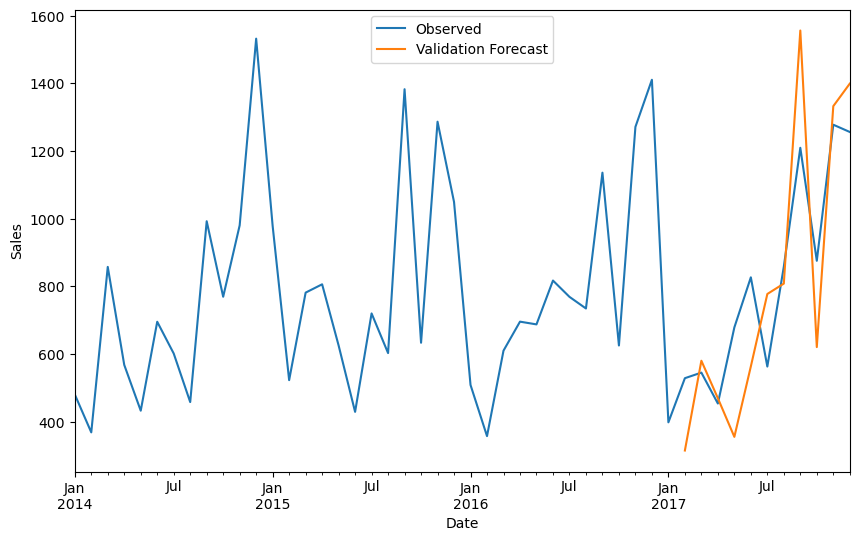

In [57]:
pred= model.get_prediction(start=pd.to_datetime('2017-02-01'))
#pred= model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
y.plot(label="Observed")
pred.predicted_mean.plot(label="Validation Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")


plt.legend()
plt.show()

In [56]:
pred.predicted_mean

2018-01-01     481.175784
2018-02-01     504.162674
2018-03-01     534.896814
2018-04-01     623.058259
2018-05-01     658.537452
2018-06-01     789.387683
2018-07-01     619.269526
2018-08-01     736.930529
2018-09-01    1072.136429
2018-10-01     627.864108
2018-11-01    1161.662901
2018-12-01    1229.291177
Freq: MS, Name: predicted_mean, dtype: float64

In [64]:
y['2017-01-01':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [67]:
Y_pred=pred.predicted_mean
Y_test=y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms= sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


111.96642469789522


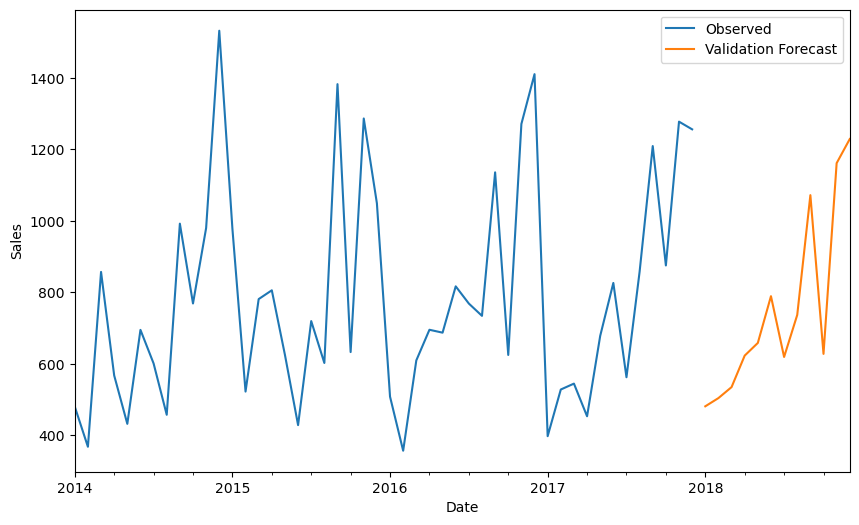

In [58]:
pred= model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
y.plot(label="Observed")
pred.predicted_mean.plot(label="Validation Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()